This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib.colors import ListedColormap
import random
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv("/home/akshay/Downloads/MAIL/HW4/q2-data/data.csv")

In [5]:
# (a)
# data preprocessing
def data_preprocessing():
    data = pd.read_csv("/home/akshay/Downloads/MAIL/HW4/q2-data/data.csv")
    x = np.zeros((0,2), dtype=np.float64)
    y = np.zeros((2000,1), dtype=np.float64)
    
    for i in range(2,42,2):
        curr_data = data.iloc[:,i-2:i]
        x = np.concatenate([x, np.asarray(curr_data)],axis=0)
        y[int((i-2)*100/2):int((i*100)/2),0] = (i-2)/2
        
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, )
    return x, y, X_train, X_test, y_train, y_test  

x, y, X_train, X_test, y_train, y_test = data_preprocessing()
csv_rows = np.concatenate([x, y], axis=1)
#pd.DataFrame(csv_rows).to_csv("/home/akshay/Downloads/MAIL/HW4/q2_ordered.csv")


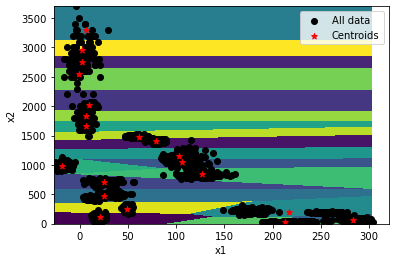

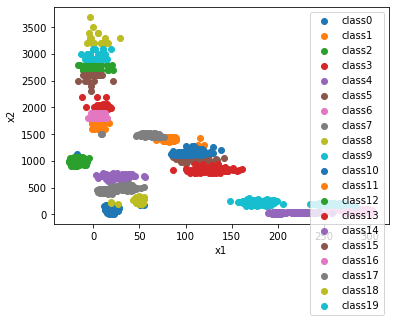

In [5]:
# (b)
# k-means
def kmeans(X_train, X_test, y_train, y_test, data):
    #defining kmeans and training the data
    kmeans = KMeans(20)
    kmeans.fit(X_train)
    
    #predicting clusters of train and test
    train_pred = kmeans.predict(X_train)
    test_pred = kmeans.predict(X_test)
    centroids = kmeans.cluster_centers_

    predicted_classes = []
   
    #storing the prediction by classes, after predicting the results using the trained kmeans
    #both training and testing are predicted
    for i in range(20):
        class_i_train = X_train[np.where(train_pred == i)]
        class_i_test = X_test[np.where(test_pred == i)]
        class_i = np.concatenate([class_i_train, class_i_test], axis=0)
        predicted_classes.append(class_i)

    # generating a meshgrid
    h = .9
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    
    x1, y1 = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    xx = x1.reshape(-1,1)
    yy = y1.reshape(-1,1)
    
    #predicting values of the meshgrid
    mesh_data = np.concatenate([xx,yy],axis = 1)
    predicted_mesh = kmeans.predict(mesh_data)
    predicted_mesh = predicted_mesh.reshape(x1.shape)
    
    
    fig, ax = plt.subplots(1)
    #plotting the decision boundaries on all data
    ax.pcolormesh(x1,y1,predicted_mesh, shading='auto')
    ax.scatter(data[:,0], data[:,1], color=(0,0,0), label="All data")
    ax.scatter(centroids[:,0], centroids[:,1], color='r', label="Centroids", marker='*')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend()
    
    #plotting different classes with different colors according to the assigned kmeans cluster
    i = 0
    fig2, ax2 = plt.subplots(1)
    #plotting the
    for class_ in predicted_classes:
        #rgb = np.random.rand(3,)
        ax2.scatter(class_[:,0], class_[:,1], label="class"+str(i))
        i += 1
        
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.legend()

kmeans(X_train, X_test, y_train, y_test, x)

train accuracy: 1.0
test accuracy: 0.9783333333333334


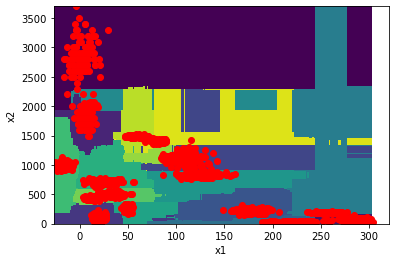

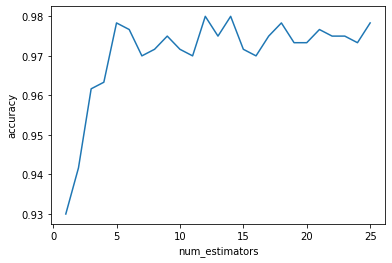

In [6]:
# (c)
# random forest
def randomForest(X_train, X_test, y_train, y_test, data):
    randomForest = RandomForestClassifier()
    randomForest.fit(X_train, y_train.squeeze())
    print("train accuracy:", randomForest.score(X_train, y_train.squeeze()))
    print("test accuracy:", randomForest.score(X_test, y_test))

    h = .9
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    
    x1, y1 = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    xx = x1.reshape(-1,1)
    yy = y1.reshape(-1,1)
    
    #predicting values of the meshgrid
    mesh_data = np.concatenate([xx,yy],axis = 1)
    predicted_mesh = randomForest.predict(mesh_data)
    predicted_mesh = predicted_mesh.reshape(x1.shape)
    
    fig, ax = plt.subplots(1)
    #plotting the decsision boundaries
    ax.pcolormesh(x1,y1,predicted_mesh, shading='auto')
    ax.scatter(data[:,0], data[:,1], color='r')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    
randomForest(X_train, X_test, y_train, y_test, x) 

def accuracy_vs_estimators(X_train, X_test, y_train, y_test, x):
    score = []
    for i in range(1, 26, 1):
        #append the accuracy on the test dataset to the list
        randomForest = RandomForestClassifier(n_estimators=i)
        randomForest.fit(X_train, y_train.squeeze())
        y_t_sq = y_test.squeeze()
        score.append(randomForest.score(X_test, y_t_sq))
        
    num_estimators = np.arange(1,26,1)
    fig1, ax2 = plt.subplots(1)
    ax2.plot(num_estimators, score)
    ax2.set_ylabel("accuracy")
    ax2.set_xlabel("num_estimators")
    
accuracy_vs_estimators(X_train, X_test, y_train, y_test, x)

# (d)
# Analysis
1. The decision boundary for kmeans is piece-wise linear, while the random forest is parallel to x, or y-axis.
2. Random forest gives 100 accuarcy on the training set, while a little less on the test set. We can say that random forest does over-fitting in some cases. 
3. The accuracy of random forest is  way better than k-means because it uses the labels(supervised learning). 
4. And as the number of estimators increase the test accuracy seems to increase for the random forest, because it starts to generalize by using a large number of trees.
5. Large number of trees(num_estimators) makes the random forest algorithm slow, both in time and space complexity
